In [70]:
#print("HKHR : ", os.getcwd())
#Import libraries:
import pandas as pd
import numpy as np

import xgboost as xgb
from xgboost import plot_tree
from xgboost.sklearn import XGBClassifier

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score   #Additional scklearn functions
from sklearn.model_selection import cross_validate   #Additional scklearn functions
from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, f1_score, precision_recall_curve, accuracy_score, precision_score, recall_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, f1_score, precision_recall_curve, accuracy_score, precision_score, recall_score, cohen_kappa_score, average_precision_score

from sklearn.model_selection import GridSearchCV   #Perforing grid search

import itertools
import matplotlib.pyplot as plt 
import graphviz
import seaborn as sns
from sklearn.tree import export_graphviz
from IPython.display import Image

import shap

%matplotlib inline

In [6]:
data = pd.read_csv(r'cell2celltrain.csv')
data.shape

(51047, 58)

In [7]:
data.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.104700e+04,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,...,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,3.201957e+06,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,...,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,1.169056e+05,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,...,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100632e+06,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,...,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201534e+06,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,...,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.305376e+06,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,...,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399994e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,...,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


In [8]:
data = data.dropna()
data.shape

(49752, 58)

In [12]:
data.columns
col_list = ['MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus']

len(col_list)

56

In [14]:
from sklearn.model_selection import train_test_split

def imbalance_data_train_test_split(dataset, target_varibale, test_spit_size=0.20):
    seed = 41
    
    data_positive_class = dataset[dataset[target_varibale] == 'Yes']
    data_negative_class = dataset[dataset[target_varibale] == 'No']
    print("data_positive_class shape: ", data_positive_class.shape, "\ndata_negative_class shape: ", data_negative_class.shape)
    
    X_data_positive_class = data_positive_class.drop(target_varibale, axis=1)
    Y_data_positive_class = data_positive_class[[target_varibale]]
    X_data_positive_class_train, X_data_positive_class_test, Y_data_positive_class_train, Y_data_positive_class_test = train_test_split(X_data_positive_class, Y_data_positive_class, test_size=test_spit_size, random_state=seed)

    X_data_negative_class = data_negative_class.drop(target_varibale, axis=1)
    Y_data_negative_class = data_negative_class[[target_varibale]]
    X_data_negative_class_train, X_data_negative_class_test, Y_data_negative_class_train, Y_data_negative_class_test = train_test_split(X_data_negative_class, Y_data_negative_class, test_size=test_spit_size, random_state=seed)


    X_train = pd.concat([X_data_positive_class_train, X_data_negative_class_train], axis=0)
    y_train = pd.concat([Y_data_positive_class_train, Y_data_negative_class_train], axis=0)
    X_test = pd.concat([X_data_positive_class_test, X_data_negative_class_test], axis=0)
    y_test = pd.concat([Y_data_positive_class_test, Y_data_negative_class_test], axis=0)

    print(X_train.shape[0]+X_test.shape[0], y_train.shape[0]+y_test.shape[0])
    
    return X_train, X_test, y_train, y_test

def column_name_special_char_handling(train, test):
    traincol = train.columns
    testcol = test.columns

    new_train_col = []
    for col in traincol:
        new_train_col.append(col.replace("/", "").replace("(", "").replace(")", "").replace("?", "").replace(" ", "_"))
    train.columns = new_train_col
    
    new_test_col = []
    for col in testcol:
        new_test_col.append(col.replace("/", "").replace("(", "").replace(")", "").replace("?", "").replace(" ", "_"))
    test.columns = new_test_col
    
    return train, test

def train_test_data_for_platform(X_train, X_test, y_train, y_test):
    
    train_data = pd.concat([X_train, y_train], axis=1)
    test_data = pd.concat([X_test, y_test], axis=1)
    
    #train, test = column_name_special_char_handling(train_data, test_data)
    train = train_data
    test = test_data
    
    print("train_data shape : ",train.shape, "\ntest_data shape : ",test.shape)
    
    return train, test

In [16]:
target_varibale = 'Churn'

X_train, X_test, y_train, y_test = imbalance_data_train_test_split(data, target_varibale, test_spit_size=0.20)
_train_data, _test_data = train_test_data_for_platform(X_train, X_test, y_train, y_test)

data_positive_class shape:  (14245, 58) 
data_negative_class shape:  (35507, 58)
49752 49752
train_data shape :  (39801, 58) 
test_data shape :  (9951, 58)


In [17]:
print(_train_data[_train_data[target_varibale]=='Yes'].shape)
print(_train_data[_train_data[target_varibale]=='No'].shape)
print(_test_data[_test_data[target_varibale]=='Yes'].shape)
print(_test_data[_test_data[target_varibale]=='No'].shape)

(11396, 58)
(28405, 58)
(2849, 58)
(7102, 58)


In [18]:
train = _train_data
test = _test_data

In [19]:
train.columns

Index(['CustomerID', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup',
    

In [30]:
print(train.columns)
boost_col = ['MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus']

target_flag = target_varibale

Index(['CustomerID', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup',
    

In [31]:
train.dtypes

CustomerID                     int64
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
ServiceArea                    int32
Handsets                     float64
H

In [62]:
for i,col in enumerate(boost_col):
    #print("\n===============>",col)
    if(train[col].dtypes == 'object'):
        le = LabelEncoder()
        train[col] = le.fit_transform(train[col].astype(str))
        #print(le.classes_)

        test[col] = test[col].map(lambda s: '<unknown>' if s not in le.classes_ else s)
        le.classes_ = np.append(le.classes_, '<unknown>')

        test[col] = le.transform(test[col])

In [24]:
print(train.shape)
train.head(3)

(39801, 58)


,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Churn
24011,3188958,60.70,1027.0,63.0,1.49,0.0,0.0,-596.0,-63.5,6.3,...,7,0,0,1,0,4,0,3,1,1
32550,3259114,111.19,1509.0,54.0,4.46,141.0,0.0,361.0,111.5,10.7,...,3,0,0,15,0,4,0,4,1,1
22466,3176510,48.88,1033.0,45.0,0.50,34.0,0.0,-95.0,30.5,6.7,...,0,0,0,10,0,1,0,3,1,1


In [25]:
print(test.shape)
test.head(3)

(9951, 58)


,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Churn
37895,3302050,19.99,0.0,30.0,0.00,0.0,0.0,0.0,0.0,0.0,...,2,0,0,15,0,1,0,3,1,1
17158,3134386,35.24,458.0,45.0,0.25,0.0,0.0,-185.0,-0.2,0.0,...,6,0,0,8,0,1,2,4,1,1
23954,3188542,53.44,9.0,60.0,0.00,0.0,0.0,-9.0,-0.4,0.3,...,3,0,0,15,0,1,2,3,1,1


In [33]:
X_train = train[boost_col]
y_train = train[target_flag]

X_test = test[boost_col]
y_test = test[target_flag]

## Metrices

In [34]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, f1_score, precision_recall_curve, accuracy_score, precision_score, recall_score, cohen_kappa_score, average_precision_score
def metrices(_type, rf_y_train, rf_y_train_pred, rf_y_train_pred_score):
    print(_type+" Accuracy:",accuracy_score(rf_y_train, rf_y_train_pred))
    print(_type+" f1_score:",f1_score(rf_y_train, rf_y_train_pred))
    print(_type+" precision_score:",precision_score(rf_y_train, rf_y_train_pred))
    print(_type+" recall_score:",recall_score(rf_y_train, rf_y_train_pred)) 
    print(_type+" Cohens kappa:",cohen_kappa_score(rf_y_train, rf_y_train_pred))
    print(_type+" ROC AUC:",roc_auc_score(rf_y_train, rf_y_train_pred))
    print(_type+" confusion_matrix:\n",confusion_matrix(rf_y_train, rf_y_train_pred))
    print(_type+" Average precision-recall score: {0:0.2f}".format(average_precision_score(rf_y_train, rf_y_train_pred_score)))

## DecisionTreeClassifier

In [73]:



new_boost_col = ['RetentionCalls', 'BlockedCalls','CustomerCareCalls','OffPeakCallsInOut','ServiceArea','HandsetRefurbished','MonthlyRevenue',
 'DroppedBlockedCalls','PercChangeRevenues','InboundCalls','DroppedCalls','AgeHH1','OverageMinutes','UniqueSubs',
 'TotalRecurringCharge','CreditRating','PercChangeMinutes','MonthsInService','MonthlyMinutes','CurrentEquipmentDays']

#dt_predictors = boost_col
dt_predictors = new_boost_col

dt_X_train = X_train[dt_predictors]
dt_y_train = y_train

dt_X_test = X_test[dt_predictors]
dt_y_test = y_test

#====
dtc = DecisionTreeClassifier(random_state=42)
#dt_pipeline_model = make_pipeline(dtc)

#dt_param_grid = {'min_samples_split' : [8, 10, 12],'max_depth': np.arange(3, 10)}
dt_param_grid = {
                "max_depth": [5,7,9],
                "min_samples_split" : [8, 10, 12],
                 #"max_features": np.arange(1, 9),
                # "min_samples_leaf": np.arange(1, 9),
                 "criterion": ["gini", "entropy"]
                }

dt_grid = GridSearchCV(dtc, dt_param_grid, cv=5)

dt_grid.fit(dt_X_train, dt_y_train)
print(dt_grid.best_params_)

dt_model = dt_grid.best_estimator_


# Traning data
rf_y_train = dt_y_train
rf_y_train_pred = dt_model.predict(dt_X_train)
rf_y_train_pred_score = dt_model.predict_proba(dt_X_train)
rf_y_train_pred_score = rf_y_train_pred_score[:, 1]

# Test data
rf_y_test = dt_y_test
rf_y_pred = dt_model.predict(dt_X_test)
rf_y_pred_score = dt_model.predict_proba(dt_X_test)
rf_y_pred_score = rf_y_pred_score[:, 1]

metrices("Train", rf_y_train, rf_y_train_pred, rf_y_train_pred_score)
print('\n\n')
metrices("Test", rf_y_test, rf_y_pred, rf_y_pred_score)

feature_score  = pd.DataFrame(list(zip(dt_X_train.dtypes.index, dt_model.feature_importances_*100)),
                columns=['Feature','Score'])
feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')
feature_score

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 8}
Train Accuracy: 0.7206854099143237
Train f1_score: 0.11241516966067866
Train precision_score: 0.6235606731620903
Train recall_score: 0.06177606177606178
Train Cohens kappa: 0.06410579475274969
Train ROC AUC: 0.5234069536129032
Train confusion_matrix:
 [[27980   425]
 [10692   704]]
Train Average precision-recall score: 0.41



Test Accuracy: 0.7171138579037283
Test f1_score: 0.10092622165442351
Test precision_score: 0.5602836879432624
Test recall_score: 0.05545805545805546
Test Cohens kappa: 0.052036997273580576
Test ROC AUC: 0.5189990924995149
Test confusion_matrix:
 [[6978  124]
 [2691  158]]
Test Average precision-recall score: 0.39


,Feature,Score
19,CurrentEquipmentDays,38.134856
17,MonthsInService,23.095863
18,MonthlyMinutes,12.788460
16,PercChangeMinutes,9.798721
14,TotalRecurringCharge,6.879613
5,HandsetRefurbished,2.692371
0,RetentionCalls,2.139286
15,CreditRating,1.410368
11,AgeHH1,1.030737
6,MonthlyRevenue,0.905723


## RandomForestClassifier

In [79]:
from sklearn.ensemble import RandomForestClassifier

#rf_predictors = boost_col
dt_predictors = new_boost_col

rf_X_train = X_train[rf_predictors]
rf_y_train = y_train

rf_X_test = X_test[rf_predictors]
rf_y_test = y_test

rfm = RandomForestClassifier(n_estimators = 100,
                           n_jobs = -1,
                           max_features = 6,
                           max_depth = 5,
                           min_samples_leaf = 20,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rfmodel = rfm.fit(rf_X_train, rf_y_train)

# Traning data
rf_y_train = rf_y_train
rf_y_train_pred = rfmodel.predict(rf_X_train)
rf_y_train_pred_score = rfmodel.predict_proba(xgb_X_train)
rf_y_train_pred_score = rf_y_train_pred_score[:, 1]

# Test data
rf_y_test = rf_y_test
rf_y_pred = rfmodel.predict(rf_X_test)
rf_y_pred_score = rfmodel.predict_proba(rf_X_test)
rf_y_pred_score = rf_y_pred_score[:, 1]

metrices("Train", rf_y_train, rf_y_train_pred, rf_y_train_pred_score)
print('\n\n')
metrices("Test", rf_y_test, rf_y_pred, rf_y_pred_score)

feature_score = feature_score = pd.DataFrame(list(zip(rf_X_train.dtypes.index, rfmodel.feature_importances_*100)),
                columns=['Feature','Score'])
feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')
feature_score

Train Accuracy: 0.7155599105550112
Train f1_score: 0.017359604201024215
Train precision_score: 0.8
Train recall_score: 0.008775008775008775
Train Cohens kappa: 0.011216192301924388
Train ROC AUC: 0.5039474410183792
Train confusion_matrix:
 [[28380    25]
 [11296   100]]
Train Average precision-recall score: 0.44



Test Accuracy: 0.7152045020600944
Test f1_score: 0.018698060941828257
Test precision_score: 0.6923076923076923
Test recall_score: 0.009477009477009477
Test Cohens kappa: 0.011050955970182241
Test ROC AUC: 0.503893672296939
Test confusion_matrix:
 [[7090   12]
 [2822   27]]
Test Average precision-recall score: 0.40


,Feature,Score
27,CurrentEquipmentDays,20.862773
21,MonthsInService,16.864541
1,MonthlyMinutes,9.480543
6,PercChangeMinutes,5.956082
2,TotalRecurringCharge,5.515334
52,CreditRating,2.702969
42,RetentionCalls,2.584805
7,PercChangeRevenues,2.508312
0,MonthlyRevenue,2.047022
32,HandsetWebCapable,2.023403


## XGBClassifier

In [40]:
xgb_predictors = boost_col

xgb_X_train = X_train[xgb_predictors]
xgb_y_train = y_train

xgb_X_test = X_test[xgb_predictors]
xgb_y_test = y_test

#xgb_X_train, xgb_X_test, xgb_y_train, xgb_y_test = train_test_split(xgb_X, xgb_Y, test_size=test_size, random_state=seed)

"""
# fit model no training data
xgb = XGBClassifier()
#xgb_model.fit(xgb_X_train, xgb_y_train)

gbt_param_grid = {
                "max_depth": [5,7,9],
                "min_samples_split" : [8, 10, 12],
                 #"max_features": np.arange(1, 9),
                # "min_samples_leaf": np.arange(1, 9),
                 "criterion": ["gini", "entropy"]
                }

gbt_grid = GridSearchCV(xgb, gbt_param_grid, cv=5)

gbt_grid.fit(xgb_X_train, xgb_y_train)
print(gbt_grid.best_params_)

xgb_model = gbt_grid.best_estimator_
"""

param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.05, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.1, colsample_bytree=0.8, #eval_metric = 'aucpr',
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(xgb_X_train, xgb_y_train)


C:\Users\Sandeep\Anaconda3\envs\dl_ver\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.05, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140,...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=1,
                                     seed=27, subsample=0.1, tree_metho

In [59]:
xgb_predictors = boost_col

xgb_X_train = X_train[xgb_predictors]
xgb_y_train = y_train

xgb_X_test = X_test[xgb_predictors]
xgb_y_test = y_test

#xgb_X_train, xgb_X_test, xgb_y_train, xgb_y_test = train_test_split(xgb_X, xgb_Y, test_size=test_size, random_state=seed)

"""
# fit model no training data
xgb = XGBClassifier()
#xgb_model.fit(xgb_X_train, xgb_y_train)

gbt_param_grid = {
                "max_depth": [5,7,9],
                "min_samples_split" : [8, 10, 12],
                 #"max_features": np.arange(1, 9),
                # "min_samples_leaf": np.arange(1, 9),
                 "criterion": ["gini", "entropy"]
                }

gbt_grid = GridSearchCV(xgb, gbt_param_grid, cv=5)

gbt_grid.fit(xgb_X_train, xgb_y_train)
print(gbt_grid.best_params_)

xgb_model = gbt_grid.best_estimator_
"""

param_test1 = {
 'max_depth':range(3,6,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.05, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.1, colsample_bytree=0.8, #eval_metric = 'aucpr',
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
#gsearch1.fit(xgb_X_train, xgb_y_train)


#gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

#xgb_model = gsearch1.best_estimator_  #'reg:logistic' 'binary:logistic'

xgb_modelfit = XGBClassifier(learning_rate =0.05, n_estimators=200, max_depth=7,
 min_child_weight=5, gamma=0, subsample=0.9, colsample_bytree=0.8, eval_metric = 'aucpr',
 objective= 'reg:logistic', nthread=4, scale_pos_weight=1, seed=27)
xgb_model = xgb_modelfit.fit(xgb_X_train, xgb_y_train)


# Traning data
rf_y_train = xgb_y_train
rf_y_train_pred = xgb_model.predict(xgb_X_train)
rf_y_train_pred_score = xgb_model.predict_proba(xgb_X_train)
rf_y_train_pred_score = rf_y_train_pred_score[:, 1]

# Test data
rf_y_test = xgb_y_test
rf_y_pred = xgb_model.predict(xgb_X_test)
rf_y_pred_score = xgb_model.predict_proba(xgb_X_test)
rf_y_pred_score = rf_y_pred_score[:, 1]

metrices("Train", rf_y_train, rf_y_train_pred, rf_y_train_pred_score)
print('\n\n')
metrices("Test", rf_y_test, rf_y_pred, rf_y_pred_score)

feature_score = feature_score = pd.DataFrame(list(zip(xgb_X_train.dtypes.index, xgb_model.feature_importances_*100)),
                columns=['Feature','Score'])
feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')
feature_score

Train Accuracy: 0.7789502776312153
Train f1_score: 0.40239097948648284
Train precision_score: 0.8905592303066747
Train recall_score: 0.25991575991575994
Train Cohens kappa: 0.31358771490715776
Train ROC AUC: 0.6235505573034177
Train confusion_matrix:
 [[28041   364]
 [ 8434  2962]]
Train Average precision-recall score: 0.73



Test Accuracy: 0.7229424178474525
Test f1_score: 0.2011011301072153
Test precision_score: 0.5764119601328903
Test recall_score: 0.1217971217971218
Test Cohens kappa: 0.11244641621729423
Test ROC AUC: 0.5429458715152886
Test confusion_matrix:
 [[6847  255]
 [2502  347]]
Test Average precision-recall score: 0.45


,Feature,Score
21,MonthsInService,4.139292
51,MadeCallToRetentionTeam,4.030832
27,CurrentEquipmentDays,3.736167
31,HandsetRefurbished,3.211305
42,RetentionCalls,3.079871
26,HandsetModels,2.967030
32,HandsetWebCapable,2.436077
1,MonthlyMinutes,2.211431
52,CreditRating,2.103061
6,PercChangeMinutes,2.071264


#### XGB Shapely Additive Explaination

In [46]:
# Commenting Temporarly
"""
importance_types = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
it = 'gain'
for f in importance_types:
    xgb_model_feature_importances_ = xgb_model.get_booster().get_score(fmap='', importance_type= f)
    fsdf = pd.DataFrame.from_dict(xgb_model_feature_importances_, orient='index', columns=['A'])
    df = fsdf.reset_index().sort_values(by='A', ascending=False)
    print('===> ', f, " <===")
    print(df)
    print('\n')
"""

'\nimportance_types = [\'weight\', \'gain\', \'cover\', \'total_gain\', \'total_cover\']\nit = \'gain\'\nfor f in importance_types:\n    xgb_model_feature_importances_ = xgb_model.get_booster().get_score(fmap=\'\', importance_type= f)\n    fsdf = pd.DataFrame.from_dict(xgb_model_feature_importances_, orient=\'index\', columns=[\'A\'])\n    df = fsdf.reset_index().sort_values(by=\'A\', ascending=False)\n    print(\'===> \', f, " <===")\n    print(df)\n    print(\'\n\')\n'

In [71]:
# DF, based on which importance is checked
xgb_importance = xgb_X_train # 
#xgb_importance = xgb_X_test

# Explain model predictions using shap library:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(xgb_importance)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


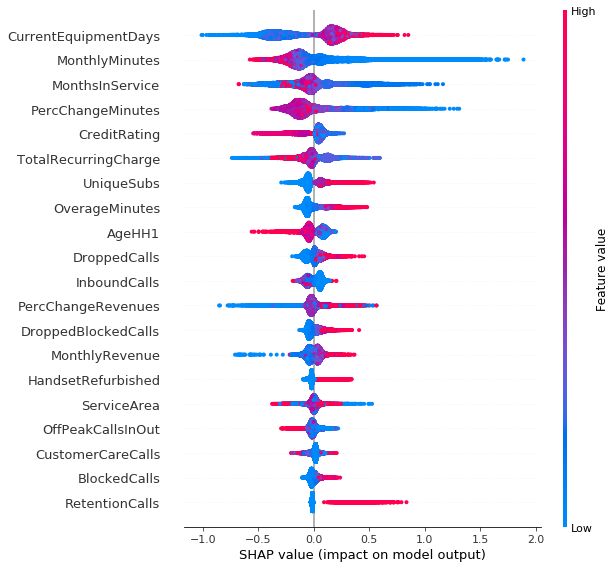

In [72]:
# Plot summary_plot
shap.summary_plot(shap_values, xgb_importance)

## Logistic Regression

In [109]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

lr_data = pd.read_csv(r'cell2celltrain.csv')
lr_data = lr_data.dropna()

lr_data['HandsetPrice'] = lr_data['HandsetPrice'].replace(to_replace = 'Unknown', value = -99, inplace=True)

#customer id col
Id_col     = ['CustomerID', 'ServiceArea']
#Target columns
target_col = ["Churn"]
#categorical columns
cat_cols   = lr_data.nunique()[lr_data.nunique() < 10].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in lr_data.columns if x not in cat_cols + target_col + Id_col]
#Binary columns with 2 values
bin_cols   = lr_data.nunique()[lr_data.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    lr_data[i] = le.fit_transform(lr_data[i])
    
#Duplicating columns for multi value columns
lr_data = pd.get_dummies(data = lr_data,columns = multi_cols )

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(lr_data[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_telcom_og = lr_data.copy()
lr_data = lr_data.drop(columns = num_cols,axis = 1)
lr_data = lr_data.merge(scaled,left_index=True,right_index=True,how = "left")

In [110]:
lr_data = lr_data.dropna()
lr_data.shape

(48616, 82)

In [111]:
lr_data[['Churn', 'CustomerID']].groupby('Churn').count()

,CustomerID
Churn,
0,34656
1,13960


In [122]:
train, test = train_test_split(lr_data, test_size = .25 ,random_state = 111)
    
##seperating dependent and independent variables
cols    = [i for i in lr_data.columns if i not in Id_col + target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

In [113]:
from sklearn.linear_model import LogisticRegression

lr_predictors = boost_col

training_x = train_X
training_y = train_Y

testing_x = test_X
testing_y = test_Y

logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

logit.fit(training_x, training_y)
predictions_train_lr   = logit.predict(training_x)
probabilities_train_lr = logit.predict_proba(training_x)[:, 1]

predictions_test_lr   = logit.predict(testing_x)
probabilities_test_lr = logit.predict_proba(testing_x)[:, 1]
print (logit)

metrices("Train", training_y, predictions_train_lr, probabilities_train_lr)
print('\n\n')
metrices("Test", testing_y, predictions_test_lr, probabilities_test_lr)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Train Accuracy: 0.7118095551533103
Train f1_score: 0.020141738157403954
Train precision_score: 0.48214285714285715
Train recall_score: 0.010285714285714285
Train Cohens kappa: 0.008210388423226855
Train ROC AUC: 0.5029088227849494
Train confusion_matrix:
 [[25846   116]
 [10392   108]]
Train Average precision-recall score: 0.35



Test Accuracy: 0.7136745104492348
Test f1_score: 0.01971830985915493
Test precision_score: 0.3888888888888889
Test recall_score: 0.010115606936416185
Test Cohens kappa: 0.005361220396059574
Test ROC AUC: 0.5018947024790201
Test confusion_matrix:
 [[8639   55]
 [3425   35]]
Test Average precision-recall score: 0.35


## NeuralNet

In [138]:
from sklearn.metrics import auc, confusion_matrix, roc_curve, roc_auc_score, f1_score, precision_recall_curve, accuracy_score, precision_score, recall_score, cohen_kappa_score, average_precision_score

def metrices_plot(output_df, actual_col, pred_col, pred_score, metrics_type="Train"):
    
    actual_values = output_df[actual_col]
    pred_values = output_df[pred_col]
    
    print('=============================='+metrics_type+'-SCORE========================================')
    print(metrics_type+' confusion_matrix:\n',confusion_matrix(actual_values, pred_values))
    print(metrics_type+' Accuracy:',accuracy_score(actual_values, pred_values))
    print(metrics_type+' f1_score:',f1_score(actual_values, pred_values))
    print(metrics_type+' precision_score:',precision_score(actual_values, pred_values))
    print(metrics_type+' recall_score:',recall_score(actual_values, pred_values)) 
    print(metrics_type+' Cohens kappa:',cohen_kappa_score(actual_values, pred_values))
    print(metrics_type+' ROC AUC:',roc_auc_score(actual_values, pred_score))
    #print(metrics_type+' Average precision-recall score: {0:0.7f}'.format(average_precision_score(actual_values, pred_score)))

    precision, recall, _ = precision_recall_curve(actual_values, pred_score)
    average_precision = average_precision_score(actual_values, pred_score)
    print('==============================Precision-Recall curve========================================')
    

    print(metrics_type+' PR AUC:',auc(recall, precision))

    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
              average_precision))

In [124]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical 

train, test = train_test_split(lr_data, test_size = .25 ,random_state = 111)
    
##seperating dependent and independent variables
cols    = [i for i in lr_data.columns if i not in Id_col + target_col]
X_train = train[cols]
y_train = train[target_col]
X_test  = test[cols]
y_test  = test[target_col]

# Building Neural network
model = Sequential()
model.add(Dense(30, activation='tanh', input_dim=79))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(5, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# build the model
model.fit(X_train, y_train, epochs=300)

pred_train= model.predict(X_train)
train_scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}'.format(train_scores[1]))   
 
pred_test= model.predict(X_test)
test_scores = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}'.format(test_scores[1]))    




Epoch 1/300





36462/36462 [==============================] - 2s 61us/step - loss: 0.6137 - acc: 0.7012
Epoch 2/300
36462/36462 [==============================] - 1s 41us/step - loss: 0.5994 - acc: 0.7121
Epoch 3/300
36462/36462 [==============================] - 1s 41us/step - loss: 0.5969 - acc: 0.7119
Epoch 4/300
36462/36462 [==============================] - 1s 41us/step - loss: 0.5953 - acc: 0.7121
Epoch 5/300
36462/36462 [==============================] - 2s 42us/step - loss: 0.5945 - acc: 0.7120
Epoch 6/300
36462/36462 [==============================] - 2s 42us/step - loss: 0.5943 - acc: 0.7120
Epoch 7/300
36462/36462 [==============================] - 1s 41us/step - loss: 0.5937 - acc: 0.7123
Epoch 8/300
36462/36462 [==============================] - 2s 42us/step - loss: 0.5931 - acc: 0.7120
Epoch 9/300
36462/36462 [==============================] - 2s 41us/step - loss: 0.5925 - acc: 0.7126
Epoch 10/300
36462/36462 [==============================] - ETA: 0s - loss: 0.5924 

36462/36462 [==============================] - 1s 40us/step - loss: 0.5780 - acc: 0.7182
Epoch 65/300
36462/36462 [==============================] - 2s 46us/step - loss: 0.5781 - acc: 0.7180
Epoch 66/300
36462/36462 [==============================] - 2s 42us/step - loss: 0.5780 - acc: 0.7190
Epoch 67/300
36462/36462 [==============================] - 2s 42us/step - loss: 0.5793 - acc: 0.7179
Epoch 68/300
36462/36462 [==============================] - 2s 42us/step - loss: 0.5781 - acc: 0.7183
Epoch 69/300
36462/36462 [==============================] - 2s 41us/step - loss: 0.5778 - acc: 0.7194
Epoch 70/300
36462/36462 [==============================] - 2s 43us/step - loss: 0.5784 - acc: 0.7187
Epoch 71/300
36462/36462 [==============================] - 2s 43us/step - loss: 0.5775 - acc: 0.7179
Epoch 72/300
36462/36462 [==============================] - 2s 43us/step - loss: 0.5778 - acc: 0.7178
Epoch 73/300
36462/36462 [==============================] - 2s 45us/step - loss: 0.5783 - acc: 

Epoch 143/300
36462/36462 [==============================] - 1s 40us/step - loss: 0.5697 - acc: 0.7224
Epoch 144/300
36462/36462 [==============================] - 1s 40us/step - loss: 0.5699 - acc: 0.7227
Epoch 145/300
36462/36462 [==============================] - 1s 39us/step - loss: 0.5694 - acc: 0.7228: 1s - 
Epoch 146/300
36462/36462 [==============================] - 1s 40us/step - loss: 0.5700 - acc: 0.7221
Epoch 147/300
36462/36462 [==============================] - 1s 39us/step - loss: 0.5711 - acc: 0.7228
Epoch 148/300
36462/36462 [==============================] - 1s 39us/step - loss: 0.5698 - acc: 0.7234
Epoch 149/300
36462/36462 [==============================] - 2s 43us/step - loss: 0.5681 - acc: 0.7232
Epoch 150/300
36462/36462 [==============================] - 1s 39us/step - loss: 0.5694 - acc: 0.7220
Epoch 151/300
36462/36462 [==============================] - 1s 39us/step - loss: 0.5702 - acc: 0.7224
Epoch 152/300
36462/36462 [==============================] - 1s 39

36462/36462 [==============================] - 1s 40us/step - loss: 0.5647 - acc: 0.7252
Epoch 223/300
36462/36462 [==============================] - 1s 39us/step - loss: 0.5661 - acc: 0.7250
Epoch 224/300
36462/36462 [==============================] - 1s 40us/step - loss: 0.5661 - acc: 0.7248
Epoch 225/300
36462/36462 [==============================] - 1s 40us/step - loss: 0.5640 - acc: 0.7252
Epoch 226/300
36462/36462 [==============================] - 2s 42us/step - loss: 0.5638 - acc: 0.7272
Epoch 227/300
36462/36462 [==============================] - 1s 40us/step - loss: 0.5659 - acc: 0.7250
Epoch 228/300
36462/36462 [==============================] - 1s 39us/step - loss: 0.5652 - acc: 0.7246
Epoch 229/300
36462/36462 [==============================] - 1s 40us/step - loss: 0.5647 - acc: 0.7257
Epoch 230/300
36462/36462 [==============================] - 1s 39us/step - loss: 0.5642 - acc: 0.7262
Epoch 231/300
36462/36462 [==============================] - 1s 40us/step - loss: 0.565

36462/36462 [==============================] - 1s 39us/step - loss: 0.5624 - acc: 0.7255
Accuracy on training data: 0.7330371345543089
Accuracy on test data: 0.7094783610726376


In [140]:
cm_train = y_train.copy()
cm_train['Predicted_Outcome'] = (pred_train[:,0] > 0.5).astype(np.int)
metrices_plot(cm_train, 'Churn', 'Predicted_Outcome', pred_train, metrics_type='Train')

==============================Train-SCORE========================================
Train confusion_matrix:
 [[25828   134]
 [ 9600   900]]
Train Accuracy: 0.7330371345510395
Train f1_score: 0.15606034333275534
Train precision_score: 0.8704061895551257
Train recall_score: 0.08571428571428572
Train Cohens kappa: 0.11011368535473243
Train ROC AUC: 0.7023653398190028
==============================Precision-Recall curve========================================
Train PR AUC: 0.5229316032313014


NameError: name 'signature' is not defined

In [142]:
cm_test = y_test.copy()
cm_test['Predicted_Outcome'] = (pred_test[:,0] > 0.5).astype(np.int)
metrices_plot(cm_test, 'Churn', 'Predicted_Outcome', pred_test, metrics_type="Test")

==============================Test-SCORE========================================
Test confusion_matrix:
 [[8509  185]
 [3346  114]]
Test Accuracy: 0.7094783610334047
Test f1_score: 0.060654429369513166
Test precision_score: 0.38127090301003347
Test recall_score: 0.032947976878612714
Test Cohens kappa: 0.016095078234792615
Test ROC AUC: 0.5634067944007628
==============================Precision-Recall curve========================================
Test PR AUC: 0.32862472828004724


NameError: name 'signature' is not defined

## Partial Dependency Plot

In [52]:
def partial_dependency(bst, X, y, feature_ids = [], f_id = -1):

    """
    Calculate the dependency (or partial dependency) of a response variable on a predictor (or multiple predictors)
    1. Sample a grid of values of a predictor.
    2. For each value, replace every row of that predictor with this value, calculate the average prediction.
    """

    X_temp = X.copy()

    grid = np.linspace(np.percentile(X_temp.values[:, f_id], 0.1),
                       np.percentile(X_temp.values[:, f_id], 99.5),
                       50)
    y_pred = np.zeros(len(grid))

    if len(feature_ids) == 0 or f_id == -1:
        print('Input error!')
        return
    else:
        for i, val in enumerate(grid):

            X_temp.values[:, f_id] = val
            #data = xgb.DMatrix( X_temp.values[:, feature_ids].reshape( (len(X_temp), len(feature_ids)) ) )
            data = X_temp.values[:, feature_ids].reshape( (len(X_temp), len(feature_ids)))

            y_pred[i] = np.average(bst.predict(data))

    return grid, y_pred

In [55]:
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
 
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
_model.fit(xgb_X_train, xgb_y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

[0, 1]


C:\Users\Sandeep\Anaconda3\envs\dl_ver\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; The function ensemble.plot_partial_dependence has been deprecated in favour of sklearn.inspection.plot_partial_dependence in  0.21 and will be removed in 0.23.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Sandeep\Anaconda3\envs\dl_ver\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function partial_dependence is deprecated; The function ensemble.partial_dependence has been deprecated in favour of inspection.partial_dependence in 0.21 and will be removed in 0.23.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Sandeep\Anaconda3\envs\dl_ver\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function partial_dependence is deprecated; The function ensemble.partial_dependence has been deprecated in favour of inspection.partial_dependence in 0.21 and will be removed in 0.23.
  warnings.warn(msg

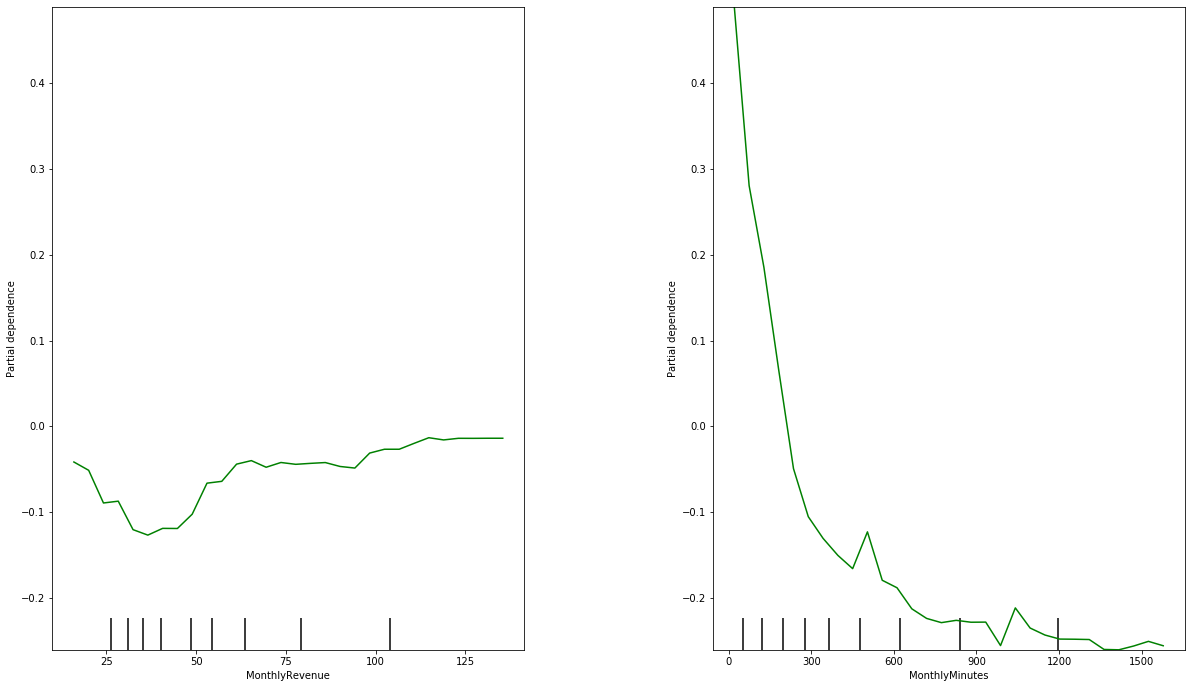

In [56]:
feat = feat = ['MonthlyRevenue', 'MonthlyMinutes']

feature_ids = []
for col in feat:
    f_id = list(xgb_X_train.columns).index(col)
    feature_ids.append(f_id)
    
print(feature_ids)

xgb_plots = plot_partial_dependence(_model,       
                                   features=feature_ids, # column numbers of plots we want to show
                                   X=xgb_X_train,            # raw predictors data.
                                   feature_names=list(xgb_X_train.columns),#['PIR', 'Type', 'Category', 'Change_Task_Groups', 'Configuration_Item_Grouped', 'Change_Tasks'], # labels on graphs
                                   grid_resolution=30) # number of values to plot on x axis

fig = plt.gcf()
fig.suptitle('')
#plt.figure(figsize=(256,256))
fig.set_size_inches(18.5, 10.5, forward=True)
plt.subplots_adjust(top=1)  # tight_layout causes overlap with suptitle

## Output:

Based on above 4 classifiers we can see that XGBT has been perfomred better that other three Models DecisionTree, 
RandomForest and LogisticRegression.